# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Completed: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
validation_file='./traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd
# Completed: Number of training examples
n_train = X_train.shape[0]

# Completed: Number of validation examples
n_validation = X_valid.shape[0]

# Completed: Number of testing examples.
n_test = X_test.shape[0]

# Completed: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# Completed: How many unique classes/labels there are in the dataset.
classes,classes_count = np.unique(y_train,return_counts=True)
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

<Container object of 43 artists>

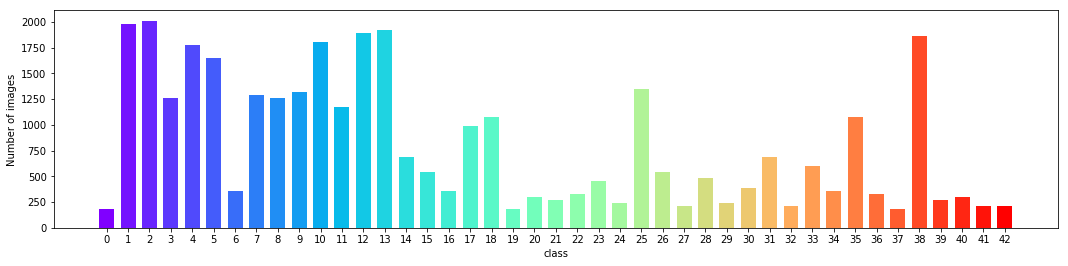

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl

# Visualizations will be shown in the notebook.
%matplotlib inline
plt.figure(figsize=(18,4))                      # increase the figure dimensions so it will be more readable

colors = mpl.cm.rainbow(classes/(n_classes-1))  # Draw each bar with different color
plt.xlabel('class')    
plt.ylabel('Number of images')
plt.xticks(classes,classes)                     # Draw the class value under each bar

plt.bar(classes,classes_count,0.7,color=colors) # Draw the bar chart


In [4]:
def plotTrafficSignsSummary(X, classes, samples_per_class, squeeze=False, cmap=None):
    for sign in pd.read_csv('./signnames.csv').values:
        class_id= sign[0]
        class_description = sign[1]
        class_samples_count = samples_per_class[class_id]
        print("{0}. {1} - Samples: {2}".format(class_id, class_description,class_samples_count ))
        sample_indice = np.where(classes==class_id)[0][0]
        fig = plt.figure(1, figsize = ( 1,43))
        image = X[sample_indice]
        axis = fig.add_subplot(1,1,1, xticks=[], yticks=[])
        if squeeze: image = image.squeeze()
        if cmap == None: axis.imshow(image)
        else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.show()

The traffic sign classifier is trained for the following traffic signs

0. Speed limit (20km/h) - Samples: 180


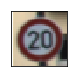

1. Speed limit (30km/h) - Samples: 1980


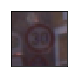

2. Speed limit (50km/h) - Samples: 2010


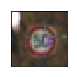

3. Speed limit (60km/h) - Samples: 1260


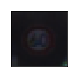

4. Speed limit (70km/h) - Samples: 1770


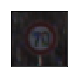

5. Speed limit (80km/h) - Samples: 1650


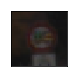

6. End of speed limit (80km/h) - Samples: 360


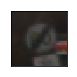

7. Speed limit (100km/h) - Samples: 1290


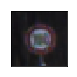

8. Speed limit (120km/h) - Samples: 1260


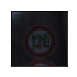

9. No passing - Samples: 1320


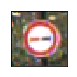

10. No passing for vehicles over 3.5 metric tons - Samples: 1800


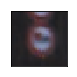

11. Right-of-way at the next intersection - Samples: 1170


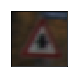

12. Priority road - Samples: 1890


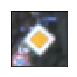

13. Yield - Samples: 1920


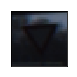

14. Stop - Samples: 690


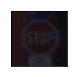

15. No vehicles - Samples: 540


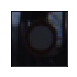

16. Vehicles over 3.5 metric tons prohibited - Samples: 360


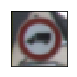

17. No entry - Samples: 990


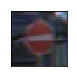

18. General caution - Samples: 1080


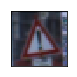

19. Dangerous curve to the left - Samples: 180


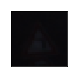

20. Dangerous curve to the right - Samples: 300


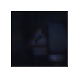

21. Double curve - Samples: 270


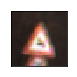

22. Bumpy road - Samples: 330


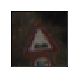

23. Slippery road - Samples: 450


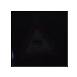

24. Road narrows on the right - Samples: 240


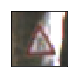

25. Road work - Samples: 1350


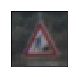

26. Traffic signals - Samples: 540


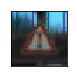

27. Pedestrians - Samples: 210


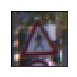

28. Children crossing - Samples: 480


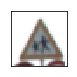

29. Bicycles crossing - Samples: 240


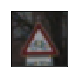

30. Beware of ice/snow - Samples: 390


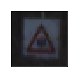

31. Wild animals crossing - Samples: 690


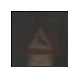

32. End of all speed and passing limits - Samples: 210


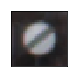

33. Turn right ahead - Samples: 599


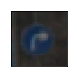

34. Turn left ahead - Samples: 360


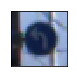

35. Ahead only - Samples: 1080


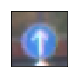

36. Go straight or right - Samples: 330


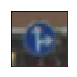

37. Go straight or left - Samples: 180


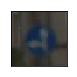

38. Keep right - Samples: 1860


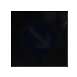

39. Keep left - Samples: 270


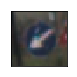

40. Roundabout mandatory - Samples: 300


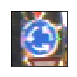

41. End of no passing - Samples: 210


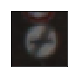

42. End of no passing by vehicles over 3.5 metric tons - Samples: 210


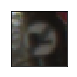

In [5]:
print ('The traffic sign classifier is trained for the following traffic signs')
print()
plotTrafficSignsSummary(X_train,y_train,classes_count)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.



# for CUDA GPU, multiplication is more than 400% faster than division (8 divisions per CPU cycle vs 1.6 division/cycle)
# http://www.nvidia.com/content/cudazone/download/OpenCL/NVIDIA_OpenCL_ProgrammingGuide.pdf

# for a 6th generation intel CPU, multiplication takes 1~2 cycles while division takes 24~90 cycles for a 64bit number
# multiplication is up to 9000% faster
# http://www.agner.org/optimize/instruction_tables.pdf

# I modified the normalization equation so it will do the same calculations without division, the devision is pre-calculated
# (pixel-128)/128 = pixel/128-128/128 = pixel*0.0078125 - 1 

from skimage import exposure
def RGB2NORMALIZED_GREY(img):
    img=np.dot(img[...,:3],[0.4,0.2,0.4])    # most traffic signs have red or blue color, no images on the dataset have green color. I assign larger weights to the RED and BLUE color. It also helps to filter out the trees and the grass.  
#    for i in range(img.shape[0]):
#        img[i] = exposure.equalize_adapthist(img[i])
    img = img*0.0078125-1
    img=np.reshape(img,img.shape+(1,))
    return img

def normalize(img,result,exit_message):
    result = RGB2NORMALIZED_GREY(img)
    print(exit_message)
    return result
   


In [7]:
import cv2

# convert the initial images to normalized greyscale images
from threading import Thread

# start multiple threads for faster performance

#Normalized_X_train=[]
#Normalized_X_valid=[]
#Normalized_X_test=[]
#p1 = Thread(target = normalize,args=(X_train,Normalized_X_train,"X_train normalized"))
#p2 = Thread(target = normalize,args=(X_valid,Normalized_X_valid, "X_valid normalized"))
#p3 = Thread(target = normalize,args=(X_test,Normalized_X_test, "X_test normalized"))
#p1.start()
#p2.start()
#p3.start()
#p1.join()
#p2.join()
#p3.join()

X_train_grey_normalized = RGB2NORMALIZED_GREY(X_train)

X_valid_grey_normalized = RGB2NORMALIZED_GREY(X_valid)

X_test_grey_normalized = RGB2NORMALIZED_GREY(X_test)


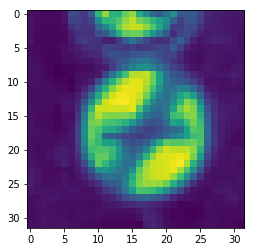

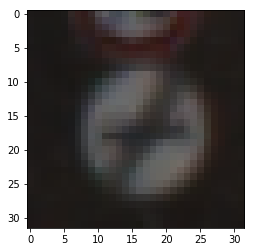

In [8]:
# verify that the images monochrome, display an image.
image = X_train_grey_normalized[0][:,:,0]
plt.figure()
plt.imshow(image.squeeze())

plt.figure()
plt.imshow(X_train[0])


In [9]:
# verify that X_train_grey values are between -1 and 1
print("max X_train_grey_normalized value: {1}", np.amax(X_train_grey_normalized))
print("min X_train_grey_normalized value: {1}", np.amin(X_train_grey_normalized))
print("max X_valid_grey_normalized value: {1}", np.amax(X_valid_grey_normalized))
print("min X_valid_grey_normalized value: {1}", np.amin(X_valid_grey_normalized))
print("max X_test_grey_normalized value: {1}", np.amax(X_test_grey_normalized))
print("min X_test_grey_normalized value: {1}", np.amin(X_test_grey_normalized))


max X_train_grey_normalized value: {1} 0.9921875
min X_train_grey_normalized value: {1} -0.9703125
max X_valid_grey_normalized value: {1} 0.9921875
min X_valid_grey_normalized value: {1} -0.959375
max X_test_grey_normalized value: {1} 0.9921875
min X_test_grey_normalized value: {1} -0.96875


### Model Architecture

In [10]:
rate = 0.005
EPOCHS = 30
BATCH_SIZE = 128  # The higher the batch size, the faster it runs , if the harware resources are sufficient. However, the quality of the model is reduced, it is more difficult to generalize.


In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


def sdim_gr(x):        
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten


In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [14]:
logits = sdim_gr(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:

from sklearn.utils import shuffle

config = tf.ConfigProto()               # configure tensorflow session
config.log_device_placement=True        # log CPU or GPU is used
config.gpu_options.allow_growth = True  # allow dynamically allocate memory to prevent an error on my system, may not be needed on other systems
sess = tf.Session(config=config)

BEST_VALIDATION_ACCURACY = 0            # store the best train results 
valid_accuracy=[]                  # store the validation accuracy per epoch
# test_accuracy=[]                        # store the test accuracy per epoch
with sess:   
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_grey_normalized)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_epoch, y_train_epoch = shuffle(X_train_grey_normalized, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_epoch[offset:end], y_train_epoch[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid_grey_normalized, y_valid)
        # test_accuracy.append(evaluate(X_test_grey_normalized,y_test)) t
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        valid_accuracy.append(validation_accuracy)
        #test_accuracy.append(evaluate(X_test_grey_normalized,y_test))
        # In case of overtraining, I want to keep the best training results, not the last one
        if validation_accuracy>BEST_VALIDATION_ACCURACY:    # if the results are better than the prevous EPOCH, save the results
            # it is expected to have validation accuracy better than 93% in this project, 
            # so I ignore all values smaller than 0.93 to save time.
            # I will check if BEST_VALIDATION_ACCURACY > 0 before I load the results to avoid an error
            if validation_accuracy>0.93:                    
                BEST_VALIDATION_ACCURACY=validation_accuracy
                saver.save(sess, './TrafficSignClassifier')
                print("Model saved")
        print()


Training...

EPOCH 1 ...
Validation Accuracy = 0.830

EPOCH 2 ...
Validation Accuracy = 0.882

EPOCH 3 ...
Validation Accuracy = 0.911

EPOCH 4 ...
Validation Accuracy = 0.910

EPOCH 5 ...
Validation Accuracy = 0.917

EPOCH 6 ...
Validation Accuracy = 0.927

EPOCH 7 ...
Validation Accuracy = 0.912

EPOCH 8 ...
Validation Accuracy = 0.905

EPOCH 9 ...
Validation Accuracy = 0.908

EPOCH 10 ...
Validation Accuracy = 0.927

EPOCH 11 ...
Validation Accuracy = 0.913

EPOCH 12 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.916

EPOCH 14 ...
Validation Accuracy = 0.930
Model saved

EPOCH 15 ...
Validation Accuracy = 0.924

EPOCH 16 ...
Validation Accuracy = 0.936
Model saved

EPOCH 17 ...
Validation Accuracy = 0.921

EPOCH 18 ...
Validation Accuracy = 0.927

EPOCH 19 ...
Validation Accuracy = 0.927

EPOCH 20 ...
Validation Accuracy = 0.934

EPOCH 21 ...
Validation Accuracy = 0.938
Model saved

EPOCH 22 ...
Validation Accuracy = 0.933

EPOCH 23 ...
Validation Accuracy = 0

In [17]:
print("Validation accuracy: {:.3f}".format(BEST_VALIDATION_ACCURACY))
## Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
config = tf.ConfigProto()               # configure tensorflow session
config.log_device_placement=True        # log CPU or GPU is used
config.gpu_options.allow_growth = True  # allow dynamically allocate memory to prevent an error on my system, may not be needed on other systems
sess = tf.Session(config=config)

with sess: 
    saver.restore(sess, tf.train.latest_checkpoint('.'))  
    train_accuracy = evaluate(X_train_grey_normalized,y_train)
    print("Training accuracy: {:.3f}".format(train_accuracy))

Validation accuracy: 0.944
INFO:tensorflow:Restoring parameters from .\TrafficSignClassifier
Training accuracy: 0.994


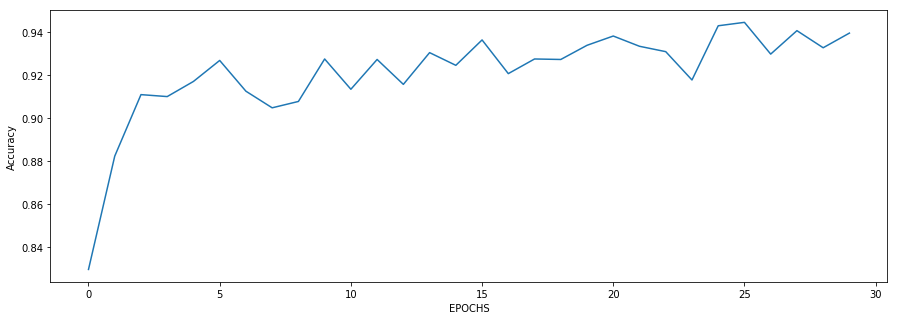

In [18]:
plt.figure(figsize=(15,5))
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.plot(range(EPOCHS),valid_accuracy)


In [19]:
with tf.Session(config=config) as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))  
    print("Test Accuracy = {:.3f}".format(evaluate(X_test_grey_normalized, y_test)))

INFO:tensorflow:Restoring parameters from .\TrafficSignClassifier
Test Accuracy = 0.912


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Speed limit (80km/h)


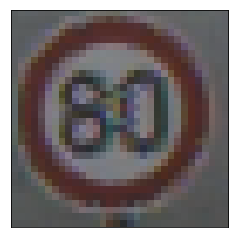

General caution


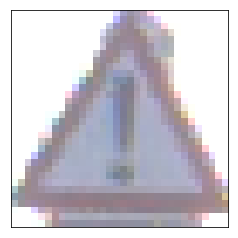

Dangerous curve to the left


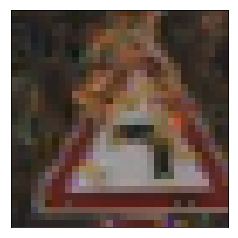

Children crossing


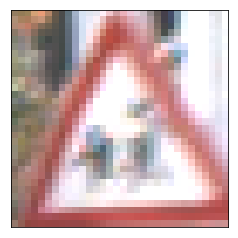

Road narrows on the right


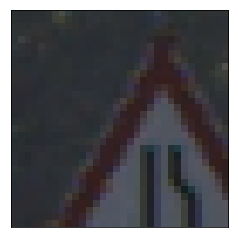

In [20]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy.misc import imread
images_directory='./german-signs-images/'
def cropimread(fn):
    "Function to crop center the image files to 32x32"
    img_pre= imread(fn)
    img= img_pre[6:38,6:38]
    return img
test_images=np.uint8(np.zeros((5,32,32,3)))
#test_images=np.array([cropimread(images_directory + '00000_00002.ppm' ),cropimread(images_directory + '00000_00003.ppm' ),cropimread(images_directory + '00000_00005.ppm' ),cropimread(images_directory + '00007_00002.ppm' ),cropimread(images_directory + '00008_00005.ppm' )])
test_images[0]=cropimread(images_directory + '1.ppm')
test_images[1]=cropimread(images_directory + '2.ppm')
test_images[2]=cropimread(images_directory + '3.ppm')
test_images[3]=cropimread(images_directory + '4.ppm')
test_images[4]=cropimread(images_directory + '5.ppm')

test_classes=np.array ([5,18,19,28,24])

class_names = pd.read_csv('./signnames.csv').values

for i in range(5):
    fig = plt.figure(i)
    print(format(class_names[test_classes[i]][1]))
    axis = fig.add_subplot(1,1,1, xticks=[], yticks=[])
    axis.imshow(test_images[i])
    plt.show()



### Predict the Sign Type for Each Image

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
config = tf.ConfigProto()               # configure tensorflow session
config.log_device_placement=True        # log CPU or GPU is used
config.gpu_options.allow_growth = True  # allow dynamically allocate memory to prevent an error on my system, may not be needed on other systems
sess = tf.Session(config=config)
test_images_grey_normalized = RGB2NORMALIZED_GREY(test_images)
with sess: 
    saver.restore(sess, tf.train.latest_checkpoint('.'))  
    test_accuracy = evaluate(test_images_grey_normalized,test_classes)
print(test_accuracy)

INFO:tensorflow:Restoring parameters from .\TrafficSignClassifier
0.40000000596


INFO:tensorflow:Restoring parameters from .\TrafficSignClassifier


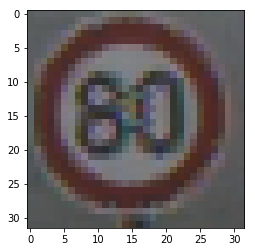

Speed limit (80km/h)

Guess 1: Speed limit (30km/h) (51%)
Guess 2: Speed limit (70km/h) (42%)
Guess 3: Speed limit (20km/h) (7%)
Guess 4: Speed limit (120km/h) (0%)
Guess 5: Speed limit (80km/h) (0%)


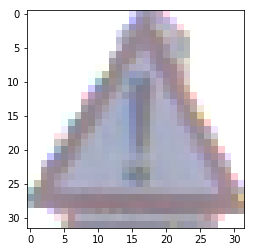

General caution

Guess 1: General caution (100%)
Guess 2: Priority road (0%)
Guess 3: Pedestrians (0%)
Guess 4: Traffic signals (0%)
Guess 5: Right-of-way at the next intersection (0%)


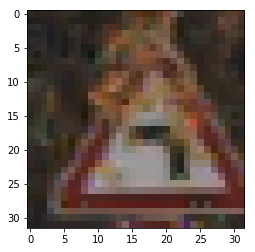

Dangerous curve to the left

Guess 1: Dangerous curve to the right (100%)
Guess 2: Traffic signals (0%)
Guess 3: Right-of-way at the next intersection (0%)
Guess 4: No passing for vehicles over 3.5 metric tons (0%)
Guess 5: Ahead only (0%)


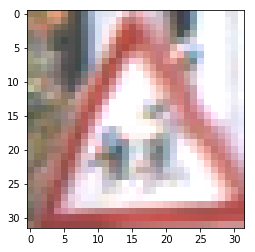

Children crossing

Guess 1: Children crossing (99%)
Guess 2: Bicycles crossing (1%)
Guess 3: Ahead only (0%)
Guess 4: Go straight or right (0%)
Guess 5: Turn left ahead (0%)


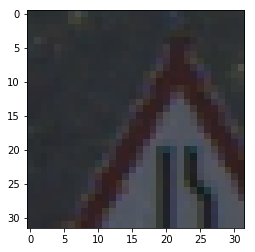

Road narrows on the right

Guess 1: Keep right (100%)
Guess 2: Speed limit (60km/h) (0%)
Guess 3: End of speed limit (80km/h) (0%)
Guess 4: Right-of-way at the next intersection (0%)
Guess 5: Speed limit (80km/h) (0%)


In [22]:
prob = tf.placeholder(tf.float32)
no_image_found = imread("./no_mach_found.bmp")


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))  
    softmax_logits = sess.run(tf.nn.softmax(logits), feed_dict={x: test_images_grey_normalized, prob: 1.0})
    top_k = sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=5), feed_dict={x: test_images_grey_normalized, prob: 1.0})
    
    
    def display_info(i,j, index,probability,k):
         print('Guess {}: {} ({:.0f}%)'.format((j-1-6*i)+1,class_names[probability][1], 100*top_k[0][i][k]))

    for i in range(5):                       # for each sign
        fig = plt.figure(i)
        plt.imshow(test_images[i])
        plt.show()
        print(format(class_names[test_classes[i]][1]))
        
        print()
        for k in range(5):                   # for each top 5 probability
            probability = top_k[1][i][k]           
            display_info(i,6*i+1+k,np.argwhere(test_classes == probability),probability,k)
        



### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [22]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")